> Data is the new oil.


Data scientists collect data from a dizzying variety of sources and in a wide range of formats. Here are some examples:  

* Scraping raw data from public databases online
* Collecting log and usage information from a website's customers
* Downloading social media user patterns and behavior
* Gathering sensory data from embedded devices and sensors

It is the data scientist's job to transform this data that can come in all shapes and sizes into something that is reliable, clean, and useful for deriving insights and taking action.

Transforming and cleaning data is so foundational to the data scientist's role that you will often hear this claim: "Data scientists spend 50% to 80% of their time cleaning and manipulating data, and the rest building and furnishing models." Although the exact time split is debatable, this statement definitely illustrates the primacy of data cleaning in the data scientist's workflow. In the figure below, you can see how data cleaning fits into the EDA process.

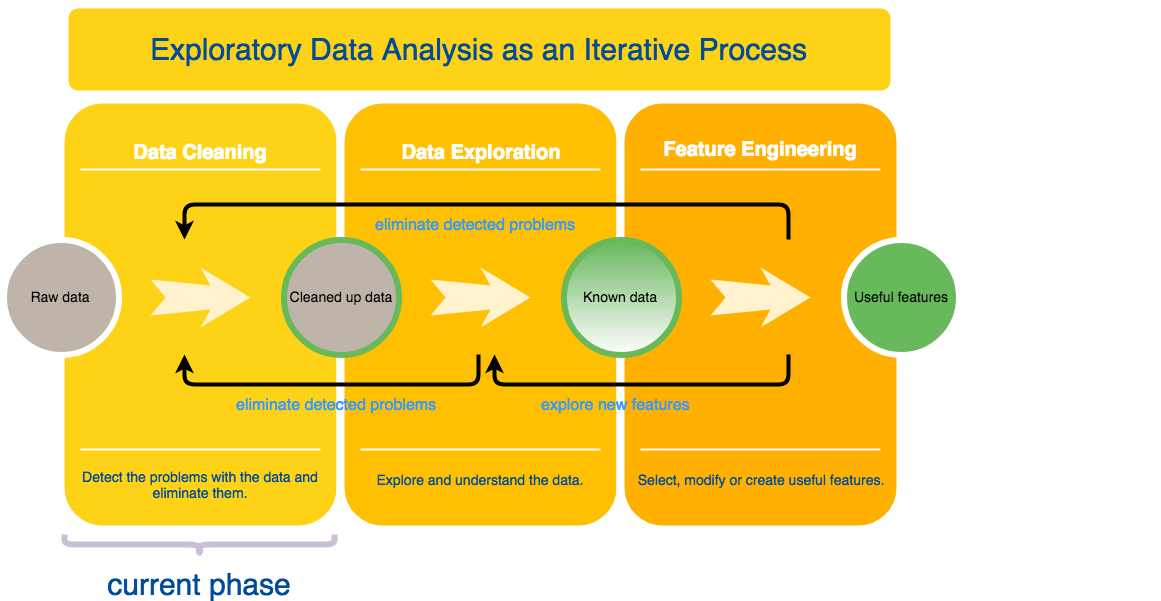
This lesson will cover the following topics:

* The definition of data cleaning
* Detecting potential problems with the data
* Dealing with missing data

There are various problems that you might encounter while cleaning data. This lesson will focus on dealing with missing data, because missing data is one of the most common problems in the real world. To explore this, you will continue working on the YouTube dataset that you used in the previous lesson. 

## What is data cleaning?

*Data cleaning* is the process of detecting problems in the data and then using a series of techniques to deal with them. Building on the "data is the new oil" analogy presented above, you can think of the data-cleaning process as similar to refining oil. 

People don't use crude oil in cars; instead, they use oil that has been processed and refined into something suitable for their cars. "Dirty" data can indeed poison your models, just as crude oil can damage car engines! This risk explains why data scientists spend so much time on data cleaning and exploration.

As a byproduct of the data-refining process, data scientists also get to know the data better. Again, the best ally that a data scientist can have is the data itself. So, the more time that you spend with the data, the cleaner you can get it. And the better you know it, the more you can get out of it. It's a win-win deal!


## Problems associated with the data

It's been mentioned several times that data cleaning involves identifying potential problems with the data. What might those be? Below are some potential problems that you could encounter: 

* Duplicate entries for the same identity
* Data that is irrelevant to the task at hand
* Structural problems, such as integers stored as text or inconsistently formatted date fields
* Extreme values and anomalies in the data that you can't quite explain. These values might "poison" your analysis for reasons that you will explore in detail in the next lesson.
* Missing values in the data, which reduce the number of data points that you can work with. This means that you can lose some valuable information. As mentioned above, the focus of this lesson is dealing with missing values. 

Detecting problems in the data is the first step of any data-cleaning process. So continue on to get started with this process.

## Detecting problems in the data

Your ability to detect problems in the data is directly related to your familiarity with the data. To get to know the data better, you need to investigate it—and to do that, you need some tools. 

These helpful tools include programming packages, visualization libraries, and statistical methods. Earlier in this program, you were introduced to pandas and Matplotlib modules as well as the foundations of statistics. You'll use that toolkit to detect problems in your data. But before that, get familiar with another useful Python library: SQLAlchemy. SQLAlchemy is a popular Python library that's used for accessing databases and querying them. Throughout this module, you'll use SQLAlchemy to access Thinkful's database and load the data that you'll use in each lesson.

Start by installing SQLAlchemy. You can install this library from your command prompt (or terminal, if you're on a Mac) by running the following command:

```bash
pip install SQLAlchemy
```

You may also need to run the following command:

```bash
pip install psycopg2-binary
```

After that, you can start to use it by importing the relevant modules from it. If you want to dig deeper into this library, you can read the [SQLAlchemy documentation](https://www.sqlalchemy.org/).


In [ ]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine, test
import warnings

warnings.filterwarnings('ignore')

In [ ]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'youtube'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# youtube_df = pd.read_sql_query('select * from youtube',con=engine)
with engine.begin() as conn:
    query = text("""SELECT * FROM youtube""")
    youtube_df = pd.read_sql_query(query, conn)

# No need for an open connection, 
# because you're only doing a single query
engine.dispose()

If you look at the code above, you'll notice that it accesses Thinkful's database by using some credentials and information about the server like its IP address and the database's port. All of this information is passed as parameters into SQLAlchemy's `create_engine()` method. After that, the `read_sql_query()` method from pandas is called using two parameters: the query string and the connection that was established by calling the `create_engine()` method. The `read_sql_query()` method returns a DataFrame as a result of the SQL query that is run. Notice that after the code is done with the database, it closes the connection as follows:

```python
engine.dispose()
```

You should always close the connection after you finish working with a database. That's a best practice for avoiding wasting your computer's and database server's resources.

## Know your data

The first thing to do when searching your data is to investigate the types of columns in your dataset. Recall from the previous lesson that you used the `info()` method from pandas to reveal the types of variables in your dataset. Below, review the output of the `info()` function:

In [ ]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Rank             5000 non-null object
Grade            5000 non-null object
Channel name     5000 non-null object
Video Uploads    5000 non-null object
Subscribers      5000 non-null object
Video views      5000 non-null int64
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


The output states that you have 6 columns and 5,000 rows. Among the columns, only `Video views` seems to be integer, and the rest appear to be text. However, as explained in the previous lesson, this is misleading. Further investigation in that lesson revealed that `Video Uploads` and `Subscribers` are also numeric. You will not repeat that analysis here; rather, you'll focus on identifying and treating the missing values in the variables.

## How to detect missing values

The pandas library includes a function called `isnull()`. This function returns `True` if an element has no value; otherwise, it returns `None` or `False` for each element in a DataFrame. 

Calling this function on your DataFrame returns the following:

In [ ]:
youtube_df.isnull()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


What's the deal here? From the output, it appears as if your dataset contains no missing values. But you know from the previous lesson that this isn't the case. All the more reason to delve into your data and carefully analyze it.

This discrepancy arises in how `isnull()` counts a missing record. The record has to be truly blank to be flagged as `True`. And in your dataset, missing values are represented with two dashes `--`; they aren't left as truly blank. 

This is a common scenario with real-world datasets, so the following question emerges: how do you find missing values when they might not be left blank? Unfortunately, there is no one-size-fits-all answer to this question. You just need to thoroughly explore and analyze your data.

One thing that you *can* do is look at all unique values in a variable and try to spot those that might be designated as a missing value. However, this approach is only effective if the number of observations in your dataset is low or if there are few unique values in a variable. 

For example, you have 5,000 data points in your YouTube dataset. This data frame will likely produce a reasonable, if slightly cumbersome, list of unique values to visually inspect. However, if you had 5 *million* observations, it might be infeasible to visually inspect what is wrong with the values.

In the previous lesson, you saw that you can call the pandas `nunique()` function to get the *count* of the unique values in each column in a DataFrame. To *list* all unique values in each column of your DataFrame, you can call the pandas `unique()` function. Now, look at the unique values for each column of the YouTube dataset:


In [ ]:
for column_name in youtube_df.columns:
    print("Unique values in column {} are: {}".format(column_name, youtube_df[column_name].unique()))

Unique values in column Rank are: ['1st' '2nd' '3rd' ... '4,998th' '4,999th' '5,000th']
Unique values in column Grade are: ['A++ ' 'A+ ' 'A ' '\xa0 ' 'A- ' 'B+ ']
Unique values in column Channel name are: ['Zee TV' 'T-Series' 'Cocomelon - Nursery Rhymes' ... 'Mastersaint'
 'Bruce McIntosh' 'SehatAQUA']
Unique values in column Video Uploads are: ['82757' '12661' '373' ... '1735' '706' '3475']
Unique values in column Subscribers are: ['18752951' '61196302' '19238251' ... '3265735' '32990' '21172']
Unique values in column Video views are: [20869786591 47548839843  9793305082 ...   311758426    14563764
    73312511]


As you can see, looking for a missing value alternative is like looking for a needle in a haystack! Rather than combing through these massive lists, you can hack a solution of your own, using data types to your advantage. 

As you've observed, the `Video Uploads` and `Subscribers` variables appear to be numeric. So, convert these fields to numeric. The values that you *can't* convert to float will likely be the problematic values. 

Try it out below: 

In [ ]:
# Print all values that cannot be converted to float
for column_name in ["Video Uploads", "Subscribers"]:
    print("These are the problematic values for the variable: {}".format(column_name))
    for value in youtube_df[column_name]:
        try:
            float(value)
        except:
            print(value)

These are the problematic values for the variable: Video Uploads
--
--
--
--
--
--
These are the problematic values for the variable: Subscribers
--
--
--
--
--
--


As you can see, the missing values in these two columns appear to be stored as two dashes `--`. Note that there may be some trailing spaces around the dashes.

Now, convert these problem records to empty strings. Then convert the variables to `float`:

In [ ]:
# Replace `--` values with empty strings

youtube_df["Video Uploads"] = youtube_df["Video Uploads"].apply(str.strip).replace("--", np.nan)
youtube_df["Video Uploads"] = pd.to_numeric(youtube_df["Video Uploads"], downcast="float")

youtube_df["Subscribers"] = youtube_df["Subscribers"].apply(str.strip).replace("--", np.nan)
youtube_df["Subscribers"] = pd.to_numeric(youtube_df["Subscribers"], downcast="float")

You can check that `Video Uploads` and `Subscribers` columns are of type `float` now:

In [ ]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Rank             5000 non-null object
Grade            5000 non-null object
Channel name     5000 non-null object
Video Uploads    4994 non-null float32
Subscribers      4613 non-null float32
Video views      5000 non-null int64
dtypes: float32(2), int64(1), object(3)
memory usage: 195.4+ KB


Now, call the `isnull()` method again to check for missing values:

In [ ]:
youtube_df.isnull()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


You can see some `True` values (check row 17). So far, so good! To get a sense of the magnitude of missing values, calculate the percentages of the missing values in all columns:

In [ ]:
youtube_df.isnull().sum()*100/youtube_df.isnull().count()

Rank             0.00
Grade            0.00
Channel name     0.00
Video Uploads    0.12
Subscribers      7.74
Video views      0.00
dtype: float64

It appears that everything is in order—you've identified and fixed the missing values that were lurking in `Video Uploads` and `Subscribers`. However, make sure that you haven't overlooked other missing values. Examine, for example, the `Grade` field. This is a categorical variable, so go ahead and print the frequencies for each value: 


In [ ]:
youtube_df.Grade.value_counts()

B+      2956
A-      1024
A        963
A+        41
A++       10
           6
Name: Grade, dtype: int64

Check the last row. It appears that you have empty string values that include trailing spaces. These extra spaces mean that they don't show up when you count the missing values! Just because a record *looks* missing to you, that doesn't mean that it is to pandas!

Convert these records to `np.nan` and then check whether your changes took effect:

In [ ]:
youtube_df.Grade = youtube_df.Grade.apply(str.strip).replace("", np.nan)

youtube_df.Grade.unique()

array(['A++', 'A+', 'A', nan, 'A-', 'B+'], dtype=object)

Based on the `nan` included in this list of unique values, it appears that you have now properly identified the missing values in the `Grade` column. 

## Approaches to handling missing values

Dealing with missing values is a complex topic that could fill at least an entire module by itself. In general, though, there are two options for dealing with missing values:

- **Disregarding the rows with missing values:** Try to avoid tossing affected rows, unless you have reason to believe that you're not losing significant information in these records. Each observation in a dataset carries some information, and that information could be invaluable to your analysis. However, if you still have abundant data points after removing these records, this might be the safest approach to take. If you're dealing with tens of thousands of records, for example, and fewer than a dozen records have missing values, continue with the analysis. It should also be mentioned that sometimes, filling in the missing values (as described next) can alter the results of your analysis. In this case, it's better to exclude the values entirely.

- **Filling the missing values with some unharmful values:** This is generally the preferred and more common approach in dealing with missing values for data science. By replacing the missing values with some other value, you keep all data points in place. This way, you can benefit from the information that these records provide.

## Filling in the missing values in a continuous variable

Continuous variables can take an unlimited number of different values. So how do you choose what to put in place of the missing values? You can use statistics to identify an appropriate value. Common approaches include filling in missing values of a variable with the mean, median, or mode of that variable. This is called missing value *imputation*. 

Remember that each of these statistics is a measure of central tendency. This means that by filling in the missing values with these statistics, you try to put values that are representative of the central tendency, such that they will not adversely impact your analysis.

Conveniently, pandas offers the `fillna()` function to replace missing values in a column with another value. Now, replace the missing values in `Video Uploads` and `Subscribers` with their respective variable means:

In [ ]:
youtube_df["Video Uploads"].fillna(youtube_df["Video Uploads"].mean(), inplace=True)
youtube_df["Subscribers"].fillna(youtube_df["Subscribers"].mean(), inplace=True)

# Be careful with `inplace=True`. It works in this case, but sometimes, it's safer to use this:
# youtube_df["Video Uploads"] = youtube_df["Video Uploads"].fillna(youtube_df["Video Uploads"].mean())
# youtube_df["Subscribers"] = youtube_df["Subscribers"].fillna(youtube_df["Subscribers"].mean())
# (See the assessment's example solution for more detail on this issue.)

In [ ]:
youtube_df.isnull().sum()*100/youtube_df.count()

Rank             0.000000
Grade            0.120144
Channel name     0.000000
Video Uploads    0.000000
Subscribers      0.000000
Video views      0.000000
dtype: float64

Another popular method for filling in the missing values is called *interpolation*. The basic idea behind interpolation is to populate missing values using representative values from similar rows. For example, if you have one missing value, you could take the average of its two closest neighboring rows and assign that value in place of the missing one. There are several interpolation techniques, such as linear, quadratic, cubic, and so forth. Choosing the right interpolation technique depends on the data and the data-generation process.

Interpolation is a common approach, especially with time series data. If you expect continuity in a variable that evolves over time, then you can use interpolation to make use of that continuity. In this sense, interpolation requires a meaningful ordering of the observations and a trend in the ordered data. Because of these unique conditions, you should be careful in applying interpolation to unordered data, where it may lead to erroneous values. If you want to learn more about this topic, check out the [interpolation Wikipedia article](https://en.wikipedia.org/wiki/Interpolation).

Applying interpolation is quite easy with the `interpolate()` function from pandas. If you're interested in learning how this function works, you can read more about it in the [official pandas documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.interpolate.html).

## Missing values in a categorical variable

Filling in missing values for categorical variables is slightly more involved than it is for continuous variables. That is because you can't use a measure of central tendency, as you can for continuous variables. Instead, you can follow one of two strategies:

- You can create a new category for the missing values like `other` or `unknown`.

- You can try to find a suitable category among the existing ones and put that category in place of the missing values. One way to establish a suitable category is to use the most common category. However, more complicated approaches are also possible. For example, in the YouTube data, the `Grade` variable is categorical. You also know that the channels are in an ordinal rank. So, if you have a missing value in `Grade`, you can fill it in with the category of the next-ranked channel. Now, use the following code to do just that in your dataset:

In [ ]:
# Fill in missing values in `Grade` with the value of the next-highest-ranked channel's category

grade_list = youtube_df.Grade

for i in range(0, len(youtube_df.Grade)):
    if pd.isnull(youtube_df.Grade[i]):
        youtube_df.Grade[i] = youtube_df.Grade[i-1]
        
youtube_df["Grade"].unique()

array(['A++', 'A+', 'A', 'A-', 'B+'], dtype=object)